In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from PIL import Image #need this to save cropped image

## Raw code for checking the working of this method

In [2]:
im = cv2.imread('./Dataset2/5_640805896.png')

In [3]:
im

array([[[149, 149, 149],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[151, 151, 151],
        [152, 152, 152],
        [160, 160, 160],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160, 160, 160],
        [160, 160, 160],
        [160, 160, 160],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[152, 152, 152],
        [150, 150, 150],
        [157, 157, 157],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[156, 156, 156],
        [141, 141, 141],
        [152, 152, 152],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[156, 156, 156],
        [155, 155, 155],
        [161, 161, 161],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

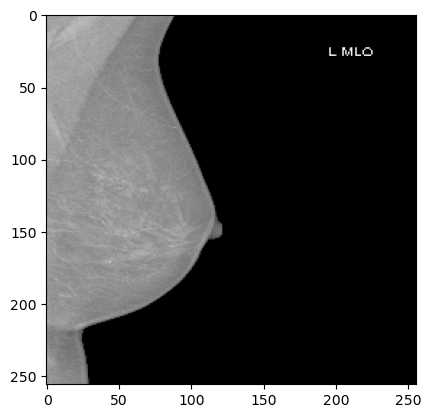

In [4]:
plt.imshow(im,cmap='gray')

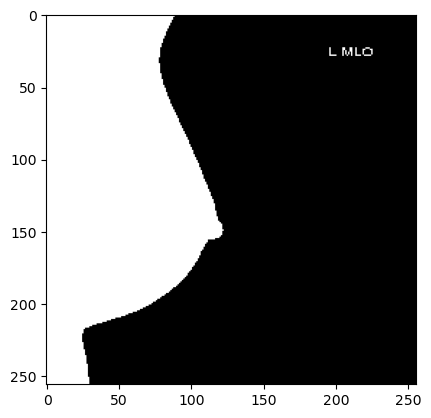

In [5]:
plt.imshow((im>0).astype(np.uint8)[:,:,0],cmap='gray')

In [6]:
true_image = (im>0).astype(np.uint8)[:,:,0]
crop = cv2.connectedComponentsWithStats(true_image,8)


In [7]:
(totalLabels, label_ids, values, centroid) = crop

In [8]:
totalLabels

6

In [9]:
values

array([[   25,     0,   231,   256, 44095],
       [    0,     0,   123,   256, 21381],
       [  196,    23,     5,     6,    10],
       [  205,    23,     7,     6,    23],
       [  214,    23,     4,     6,     9],
       [  219,    23,     7,     6,    18]], dtype=int32)

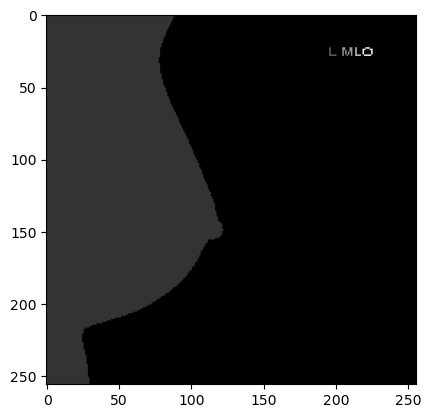

In [10]:
plt.imshow(label_ids,cmap='gray')

If you see the values part from connectedcomponentswithstats, it represents the 5 corners and the area of each connected component detected by it in a row.
The one with the largest area is usually the background and we do not want that. However, ig we think logically, in a breast mammogram, the biggest component would be the breast part. What we can do is extract the 4 corners corresponding to the breast and use those to extract the slice from the whole image, finally, we can just resize the extracted part of the image to our desired size. for us, we will resize to 256x256

In [11]:
#since we do not want to include the background (because it is also detected as one of the connected components by the function),
#we will slice the values from second row and select the index with the largest area . We will also add 1 to the index we get so that we get the actual index in the 'values' matrix
# this index will be corresponding to the breast connected component part
breast_component_index = values[1:,4].argmax() + 1

In [12]:
breast_component_index

1

In [13]:
x1, y1, w, h = values[breast_component_index][:4]
x2 = x1 + w
y2 = y1 + h

In [14]:
breast_part = im[y1:y2,x1:x2]

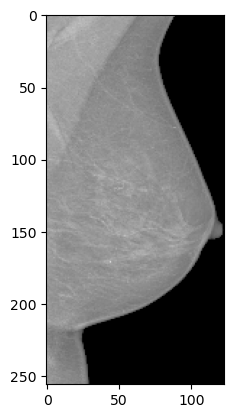

In [15]:
plt.imshow(breast_part,cmap='gray')

In [16]:
final_breast_part = cv2.resize(breast_part,(256,256))

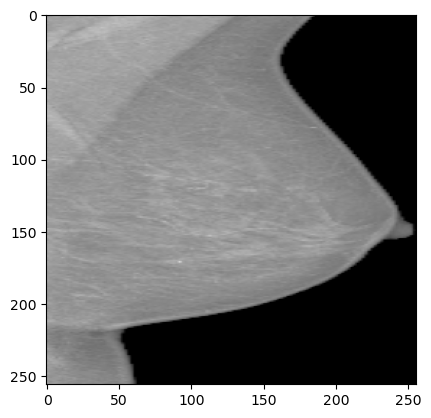

In [17]:
plt.imshow(final_breast_part,cmap='gray')

## Function and mass processing all the images

In [18]:
def get_breast_part(image_path):

    image = cv2.imread(image_path)

    
    true_image = (image>0).astype(np.uint8)[:,:,0]

    connected_components = cv2.connectedComponentsWithStats(true_image,8)

    (totalLabels, label_ids, values, centroid) = connected_components

    breast_component_index = values[1:,4].argmax() + 1

    x1, y1, w, h = values[breast_component_index][:4]
    x2 = x1 + w
    y2 = y1 + h

    breast_part = image[y1:y2,x1:x2]


    return cv2.resize(breast_part,(256,256))
    

In [19]:
df = pd.read_csv("./balanced_data.csv")

In [21]:
for im in df.image_name.values:
    image_path = os.path.join('./Dataset2',im)
    
    cropped_image_array= get_breast_part(image_path=image_path)

    cropped_image = Image.fromarray(np.uint8(cropped_image_array))

    output_folder = './CroppedDataset2'
    os.makedirs(output_folder, exist_ok=True)

    cropped_image_name = f"cropped_{im}" 
    cropped_image_path = os.path.join(output_folder, cropped_image_name)
    cropped_image.save(cropped_image_path)
